## Chapter 4

### PDP and ICE Plots
#### Here we will look at Feature Effect Analysis with Plots

##### We will look at the interpretability provided through various types of plots

We will be observing and interpreting the models with the following plots <br>
PDP, Partial Dependency Plots <br>
ICE, Individual Conditional Expectations
ALE, Accumulated Local Effects

We use the diabetes dataset from sklearn <br>

We are using the sklearn diabetes datasets. More details on the dataset can be found here <br>
 https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset




|**age**|age in years|
|-------|------------|
|**sex**|gender|
|**bmi**|body mass index|
|**bp** | average blood pressure |
| **s1** | tc, total serum cholesterol |
| **s2**  | ldl, low-density lipoproteins |
| **s3**  | hdl, high-density lipoproteins |
| **s4** | tch, total cholesterol / HDL |
| **s5** | ltg, possibly log of serum triglycerides level |
| **s6** | glu, blood sugar level |

**Import the required libraries, load the dataset and split the data into train, test**

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
diabetes = load_diabetes()

X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Printing the number of features and instances**

In [2]:
print(X.shape)

(442, 10)


**Create a pandas dataframe and run some exploratory data analysis on the data**

In [3]:
import pandas as pd
import numpy as np

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                  columns=diabetes['feature_names'] + ['target'])
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [4]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

**Data distribution on features**

In [5]:
df.groupby('sex').count()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target
sex,,,,,,,,,,
-0.044642,235,235,235,235,235,235,235,235,235,235
0.050680,207,207,207,207,207,207,207,207,207,207


**Train a GradienBoosterRegressor model and LinearRegression model**

We will run the models on linear and non-linear model to observe any changes in the plots in the two types of models.

In [6]:
clf = GradientBoostingRegressor(n_estimators=10).fit(X_train, y_train)
lm = LinearRegression().fit(X_train, y_train)
featurenames = diabetes.feature_names

**Display a PDP plot for the Linear Regression model on two features - age & sex**

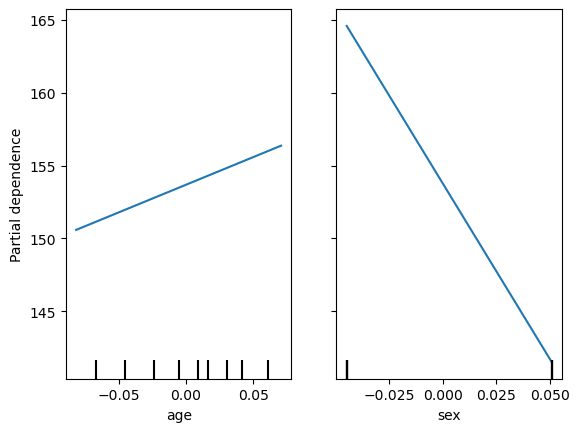

In [7]:
PartialDependenceDisplay.from_estimator(lm, X_train, [0,1], feature_names=featurenames, grid_resolution=50)
plt.show()

**Display both the PDP and ICE plots for features age and sex**

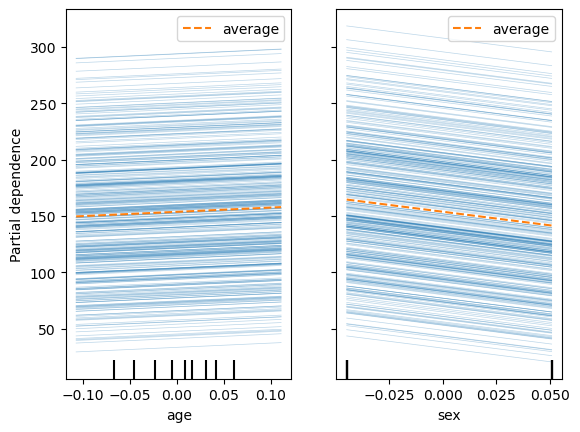

In [8]:

PartialDependenceDisplay.from_estimator(lm, X_train, [0,1], feature_names=featurenames, kind='both')
plt.show()

**Display the PDP plot for features age and sex and identify them as categorical**

This gives a more appropriate representation depending on the feature type

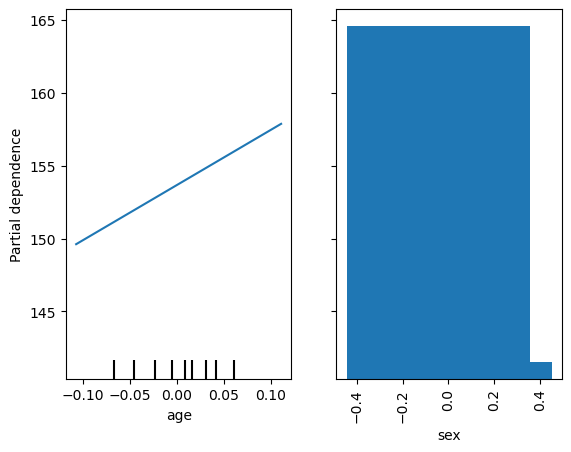

In [9]:

PartialDependenceDisplay.from_estimator(lm, X_train, [0,1], feature_names=featurenames,  categorical_features=[1])
plt.show()

**Display the PDP, ICE for bmi and bp. The third plot is a heatmap of bmi against bp**

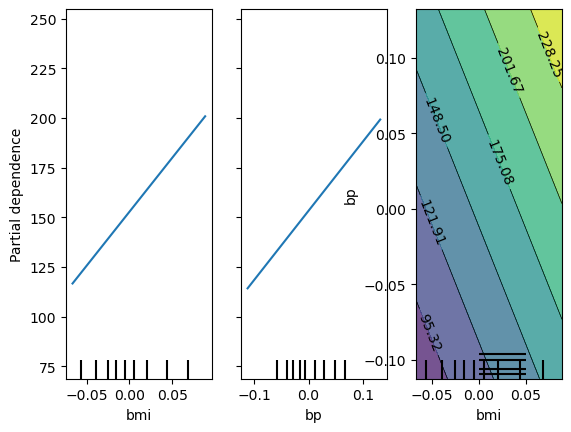

In [10]:
PartialDependenceDisplay.from_estimator(lm, X_train,[2,3,(2,3)],feature_names=featurenames)
plt.show()

**Display the PDP, ICE for bp and s1 on the training dataset. The third plot is a heatmap of bp against s1**

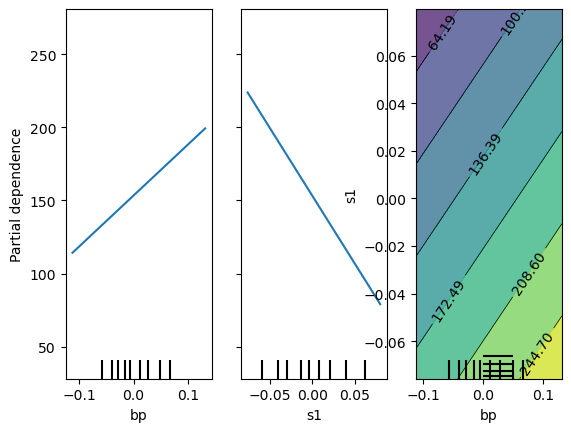

In [11]:
PartialDependenceDisplay.from_estimator(lm, X_train,[3,4,(3,4)],feature_names=featurenames)
plt.show()

**Display the PDP, ICE for bmi and bp on the test dataset. The third plot is a heatmap of bmi against bp**

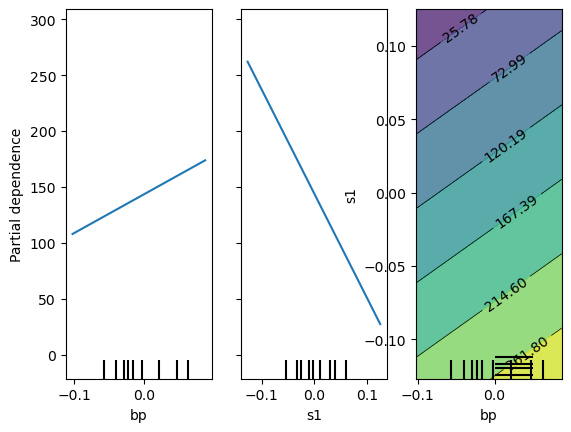

In [111]:
PartialDependenceDisplay.from_estimator(lm, X_test,[3,4,(3,4)],feature_names=featurenames)
plt.show()

**Display the PDP, ICE for bp and s1 on the training dataset. The third plot is a heatmap of bp against s1. The next few plots uses the Gradient Booster model**

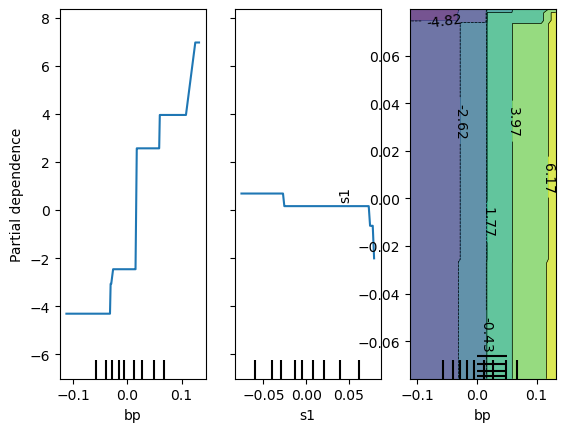

In [12]:
PartialDependenceDisplay.from_estimator(clf, X_train,[3,4,(3,4)],feature_names=featurenames)
plt.show()

**Display the combined plot for bp and s1 on the test dataset using the Gradient Booster model**

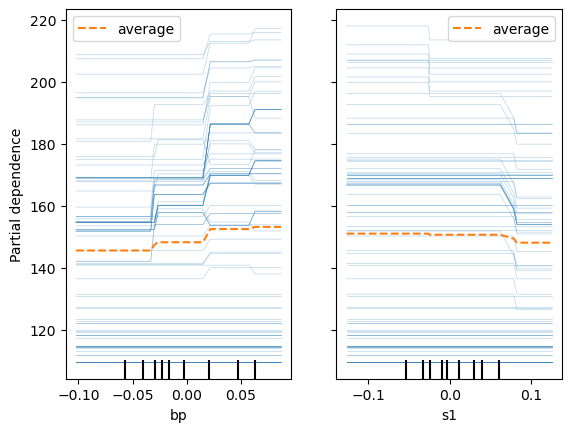

In [13]:
PartialDependenceDisplay.from_estimator(clf, X_test, [3,4], feature_names=featurenames, kind='both')
plt.show()

**Display the combined plot for s1 and s2 on the test dataset using the Gradient Booster model**

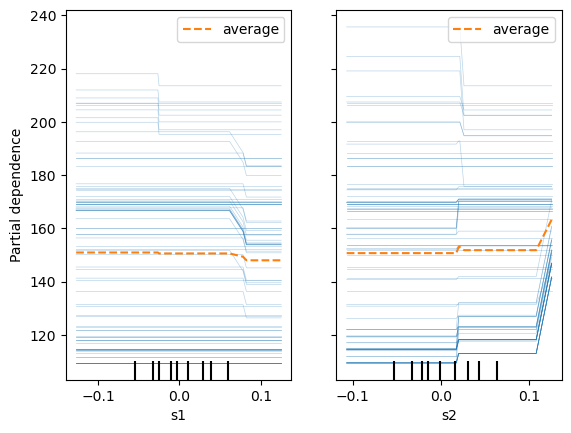

In [113]:
PartialDependenceDisplay.from_estimator(clf, X_test, [4,5], feature_names=featurenames, kind='both')
plt.show()

**Display the combined plot for s2,s5 and s6 on the test dataset using the Linear Regression model**

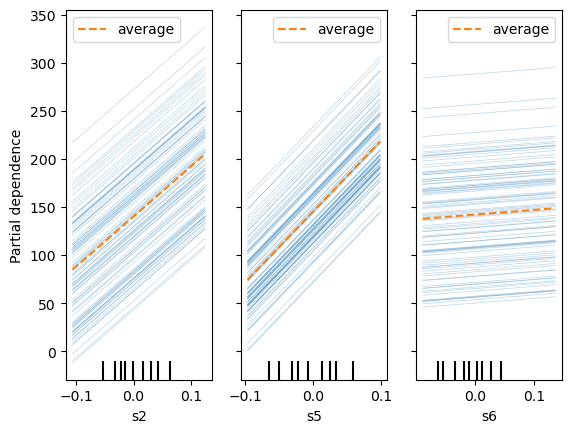

In [15]:
PartialDependenceDisplay.from_estimator(lm, X_test, [5,8,9], feature_names=featurenames, kind='both')
plt.show()

**Display the combined plot for s5 and s6 on the test dataset using the Linear Regression model**

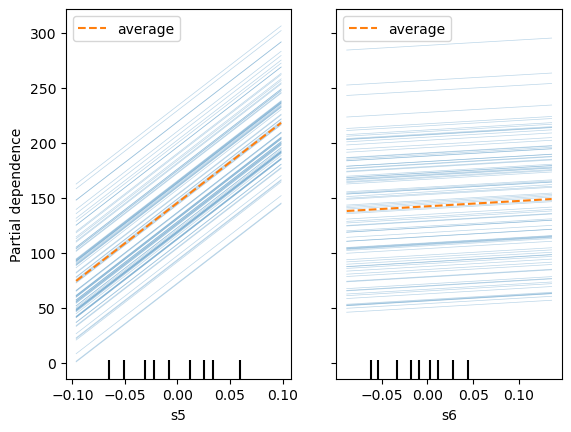

In [16]:
PartialDependenceDisplay.from_estimator(lm, X_test, [8,9], feature_names=featurenames, kind='both')
plt.show()

As seen above Linear Regression plots have a semblance of the linearity and hence the dependency plots also reflect the linearity.

**Display the combined plot for s2,s5 and s6 on the test dataset using the Gradient Booster model**

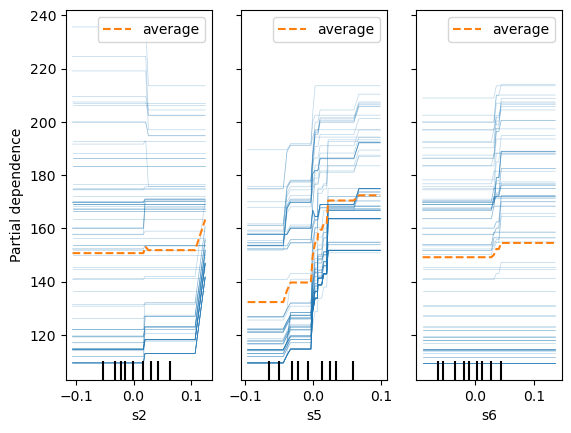

In [17]:
PartialDependenceDisplay.from_estimator(clf, X_test, [5,8,9], feature_names=featurenames, kind='both')
plt.show()

**Display the combined plot for s5 and s6 on the test dataset using the Gradient Booster model**

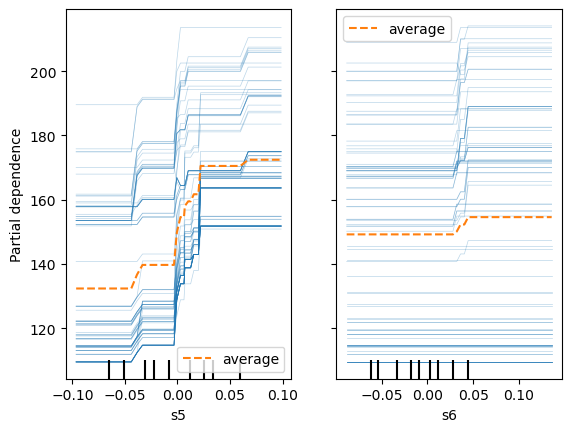

In [18]:
PartialDependenceDisplay.from_estimator(clf, X_test, [8,9], feature_names=featurenames, kind='both')

plt.show()

The plots above are from a non-linear model, Gradient Boosting Regressor and hence the plot above also reflects the non-linearity in dependency plots.

#### Next we will look at ALE plots

**Import the required libraries**

In [ ]:
!pip install pyale

**Display the ale plots on the test data for bp and s4 features**

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


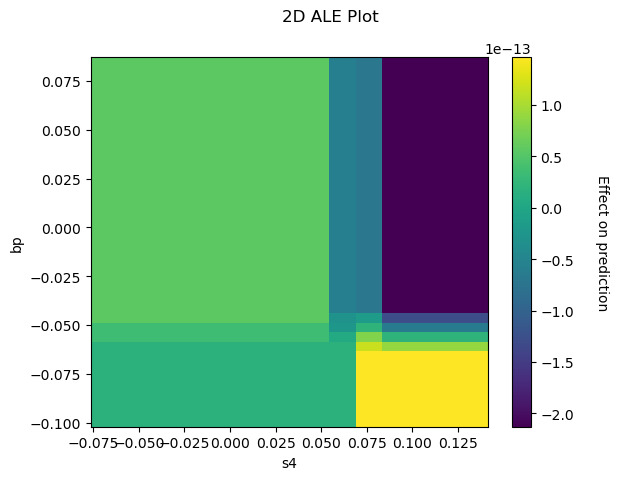

In [134]:
ale_eff = ale(X=test_data, model=clf, feature=["bp", "s4"],grid_size=60,plot=True)

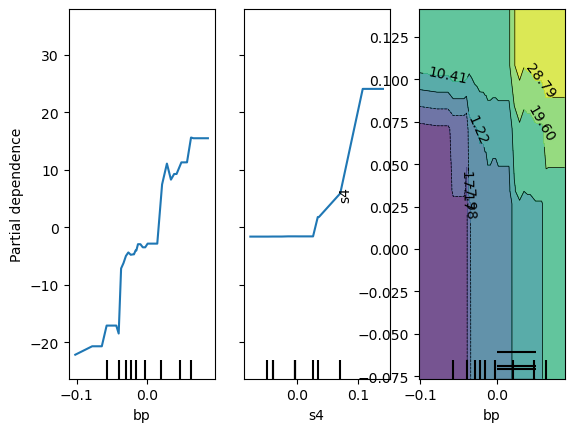

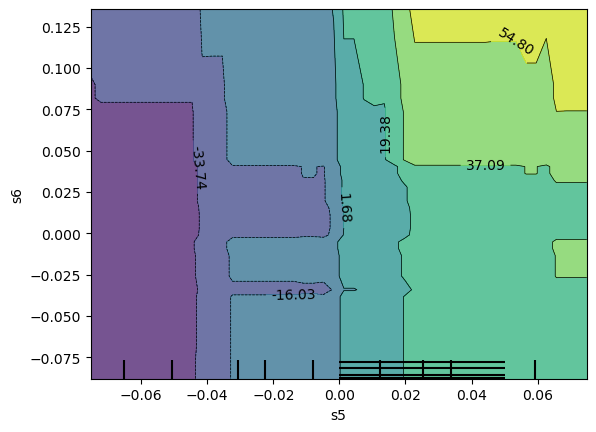

In [143]:
PartialDependenceDisplay.from_estimator(clf, X_test, [3,7,(3,7)], feature_names=featurenames, grid_resolution=50)
PartialDependenceDisplay.from_estimator(clf, X_test, [(8,9)], feature_names=featurenames, grid_resolution=50)

plt.show()

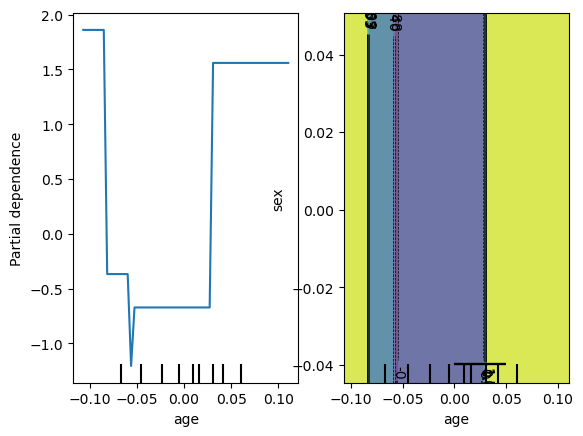

In [72]:
PartialDependenceDisplay.from_estimator(clf, X_train, [0, (0, 1)],feature_names=featurenames)
plt.show()

(89, 1)


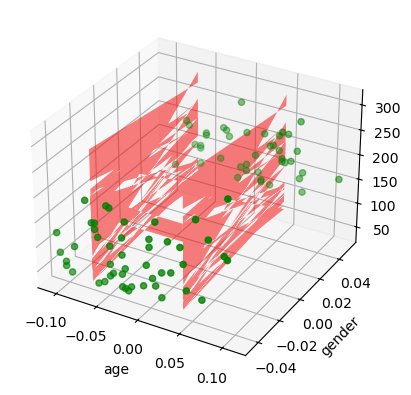

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Assuming X is your feature matrix and y is your target variable
# Also assuming that your model is named 'model'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual data
#ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='b')



# Predict z values (using your model) for the grid of x and y values
# You can use np.meshgrid to generate the grid
z_values = lm.predict(X_test)
print(z_values.reshape(-1,1).shape)
# Plot the surface

#ax.plot_surface(xm, ym, xm, color='green', alpha=0.5) # Data values as 2D arrays as stated in reference - The first 3 arguments is what you need to change in order to turn your plane into a boundary decision plane.  

xm1,xm2 = np.meshgrid(X_test[:,0], X_test[:,1])
ax.plot_surface(xm1, xm2, y_test.reshape(-1,1), alpha=0.5, rstride=100, cstride=100,color='red')
ax.scatter(X_test[:,0], X_test[:,1],z_values ,color='g')

ax.set_xlabel('age')
ax.set_ylabel('gender')
ax.set_zlabel('y')




plt.show()

(89, 1)


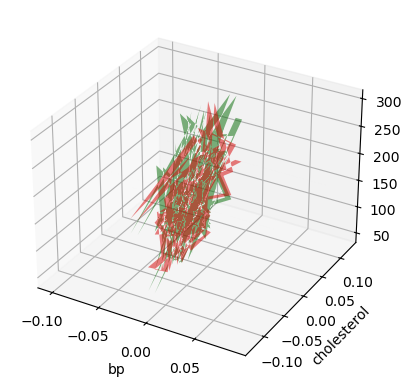

In [98]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Assuming X is your feature matrix and y is your target variable
# Also assuming that your model is named 'model'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual data
#ax.scatter(X_train[:, 3], X_train[:, 4], y_train, color='b')



# Predict z values (using your model) for the grid of x and y values
# You can use np.meshgrid to generate the grid
z_values = lm.predict(X_test)
print(z_values.reshape(-1,1).shape)
# Plot the surface

#ax.plot_surface(xm, ym, xm, color='green', alpha=0.5) # Data values as 2D arrays as stated in reference - The first 3 arguments is what you need to change in order to turn your plane into a boundary decision plane.  

xm1,xm2 = np.meshgrid(X_test[:,3], X_test[:,4])
ax.plot_surface(xm1, xm2, z_values.reshape(-1,1), alpha=0.5, rstride=100, cstride=100,color='red')
ax.plot_surface(xm1, xm2, y_test.reshape(-1,1), alpha=0.5, rstride=100, cstride=100,color='green')

ax.set_xlabel('bp')
ax.set_ylabel('cholesterol')
ax.set_zlabel('y')




plt.show()

(89, 1)


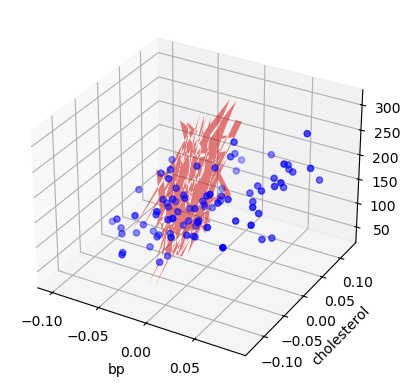

In [101]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# Assuming X is your feature matrix and y is your target variable
# Also assuming that your model is named 'model'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for actual data
#ax.scatter(X_train[:, 3], X_train[:, 4], y_train, color='b')



# Predict z values (using your model) for the grid of x and y values
# You can use np.meshgrid to generate the grid
z_values = lm.predict(X_test)
print(z_values.reshape(-1,1).shape)
# Plot the surface

#ax.plot_surface(xm, ym, xm, color='green', alpha=0.5) # Data values as 2D arrays as stated in reference - The first 3 arguments is what you need to change in order to turn your plane into a boundary decision plane.  

xm1,xm2 = np.meshgrid(X_test[:,3], X_test[:,4])
ax.scatter(X_test[:, 3], X_test[:, 4], z_values, color='b')
#ax.plot_surface(xm1, xm2, z_values.reshape(-1,1), alpha=0.5, rstride=100, cstride=100,color='red')
ax.plot_surface(xm1, xm2, y_test.reshape(-1,1), alpha=0.5, rstride=100, cstride=100,color='red')

ax.set_xlabel('bp')
ax.set_ylabel('cholesterol')
ax.set_zlabel('y')





plt.show()

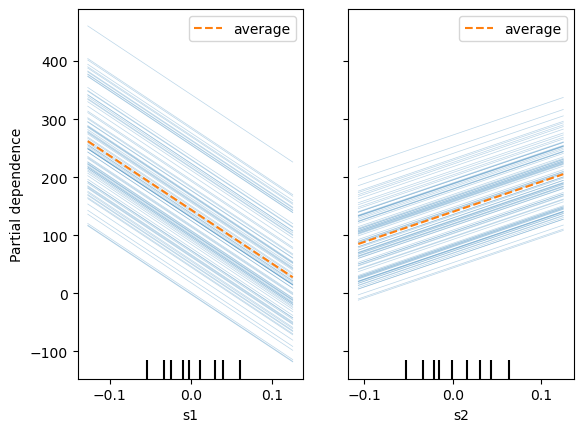

In [146]:

PartialDependenceDisplay.from_estimator(lm, X_test, [4,5], feature_names=featurenames, kind='both')
plt.show()

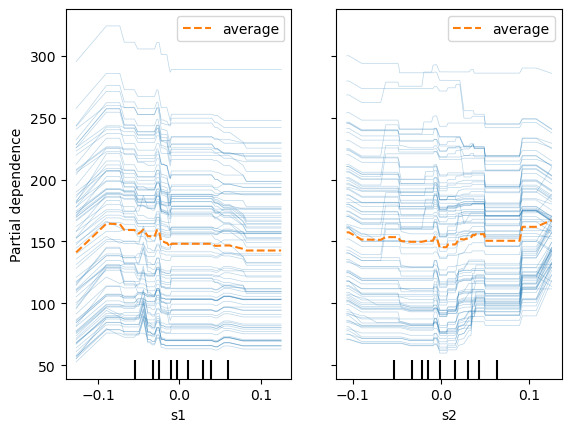

In [147]:

PartialDependenceDisplay.from_estimator(clf, X_test, [4,5], feature_names=featurenames, kind='both')
plt.show()

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(clf, X, features)

In [9]:
!pip install PyALE

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB 8.0 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.9 MB 8.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.9 MB 11.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.9 MB 13.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.9 MB 14.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/9.9 MB 15.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.9 MB 16.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 18.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.5/9.9 MB 19.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 18.5 MB/s eta 0:00:01
   ------

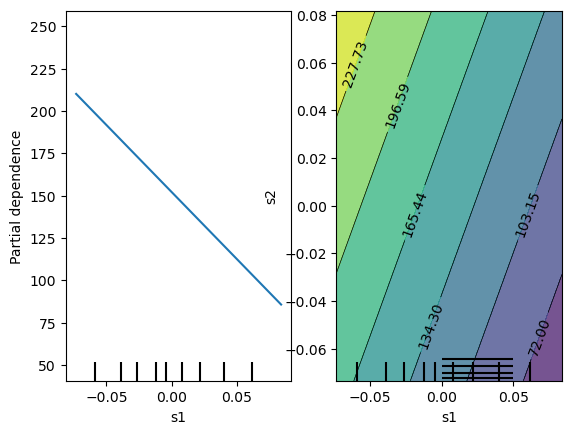

In [21]:
PartialDependenceDisplay.from_estimator(lm_all, X, [4, (4, 5)],feature_names=featurenames)
plt.show()

In [14]:

lm_all = LinearRegression().fit(df.drop('target',axis=1), df['target'])
featurenames = diabetes.feature_names

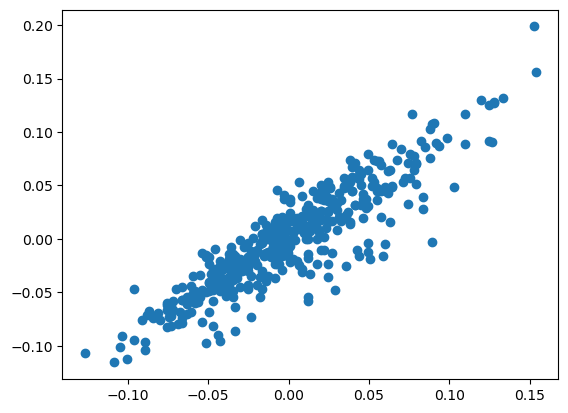

In [27]:
plt.plot(df['s1'],df['s2'],'o')

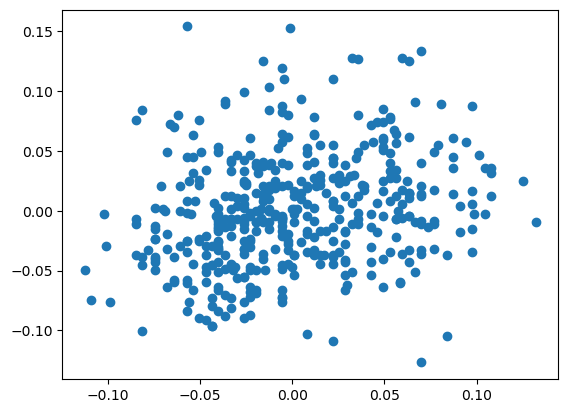

In [104]:
plt.plot(df['bp'],df['s1'],'o')

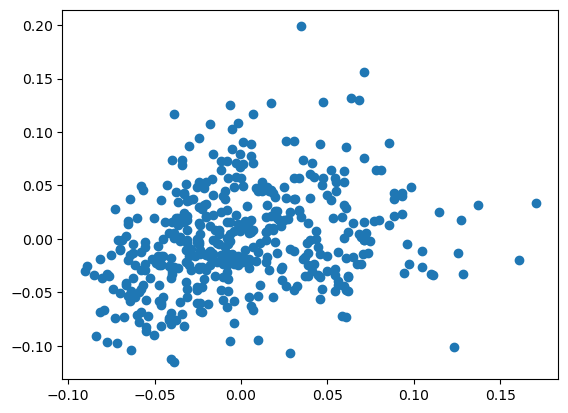

In [32]:
plt.plot(df['bmi'],df['s2'],'o')

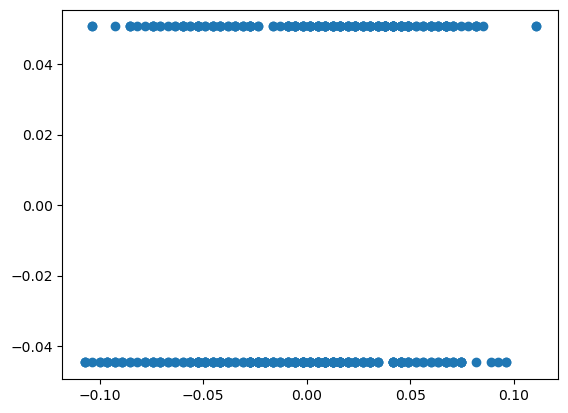

In [83]:
plt.plot(df['age'],df['sex'],'o')

PyALE._ALE_generic:INFO: Continuous feature detected.


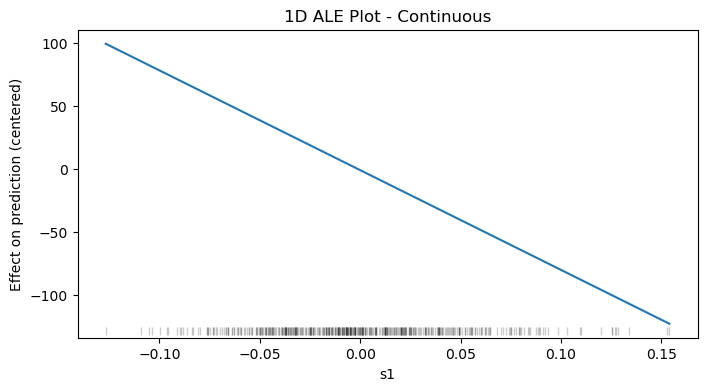

In [28]:
from PyALE import ale

## 1D - continuous - no CI
ale_eff = ale(
    X=df.drop('target',axis=1), model=lm_all, feature=["s1"], grid_size=50, include_CI=False
)

PyALE._ALE_generic:INFO: Continuous feature detected.


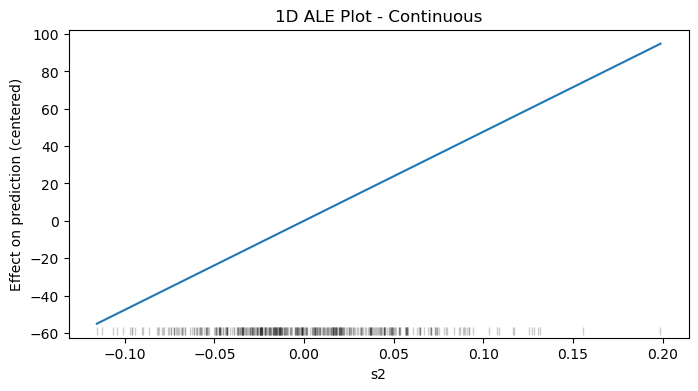

In [29]:
from PyALE import ale

## 1D - continuous - no CI
ale_eff = ale(
    X=df.drop('target',axis=1), model=lm_all, feature=["s2"], grid_size=50, include_CI=False
)

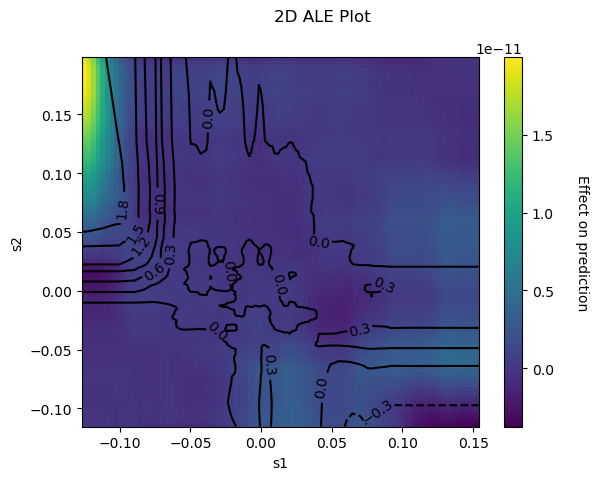

In [148]:
## 2D - continuous
ale_eff = ale(X=df.drop('target',axis=1), model=lm_all, feature=["s2", "s1"],grid_size=100,plot=True, contour=True)


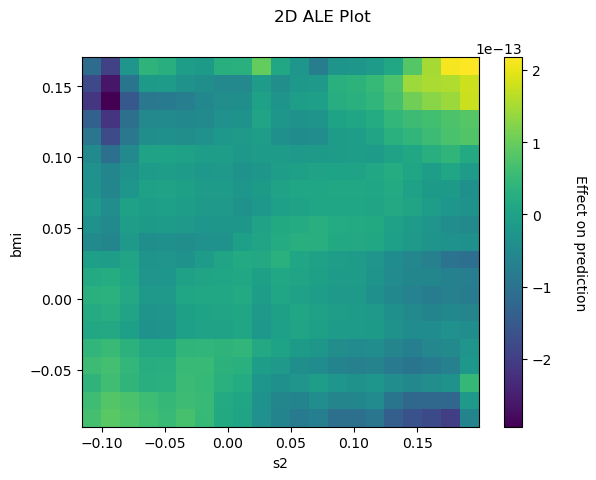

In [31]:
## 2D - continuous
ale_eff = ale(X=df.drop('target',axis=1), model=lm_all, feature=["bmi", "s2"])

<Figure size 640x480 with 0 Axes>

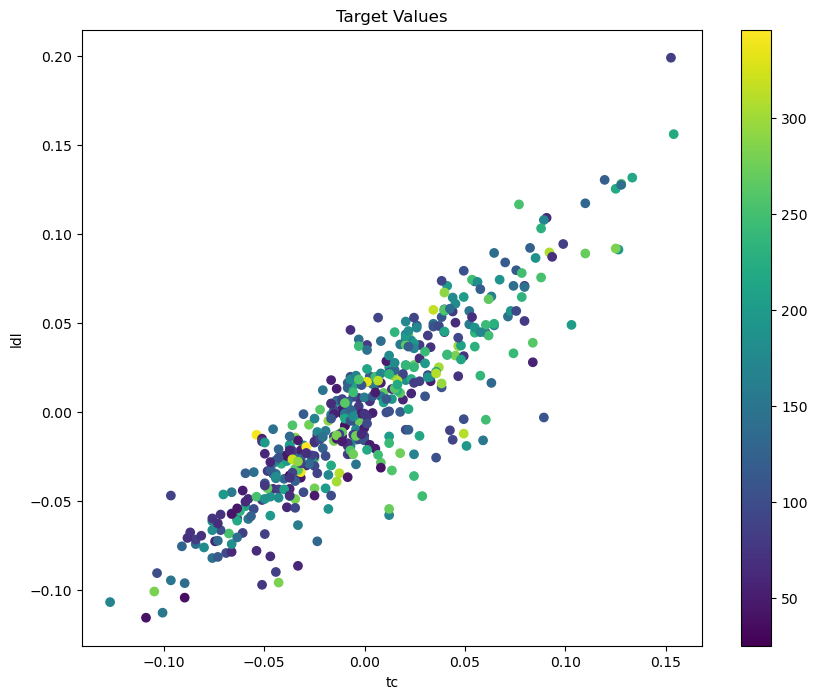

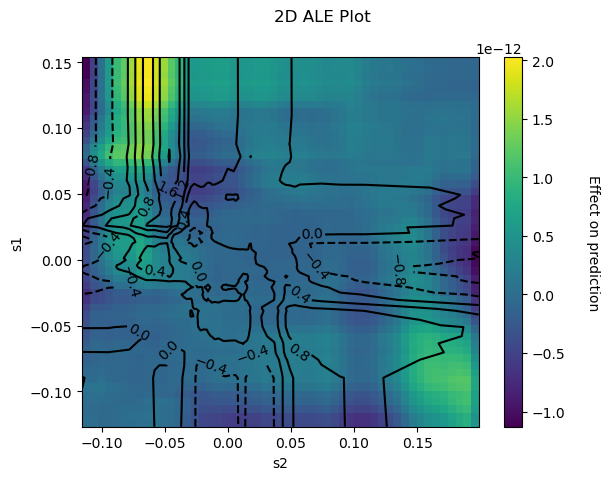

In [82]:



fig = plt.figure()
#ax = fig.add_subplot(111)


# Create a new figure for plotting
plt.figure(figsize=(10, 8))



# Overlay target values
# Note: You'll need to adjust the plotting code based on your data structure
plt.subplot(1, 1, 1)

plt.scatter(df['s1'], df['s2'], c=df['target'], cmap='viridis')
plt.colorbar()
plt.xlabel('tc')
plt.ylabel('ldl')
plt.title('Target Values')



# Plot the 2D ALE plot
# Note: You'll need to adjust the plotting code based on the output structure of ale_eff
#plt.subplot(1, 2, 2)



# Generate 2D ALE plot for features 
ale_eff = ale(X=df.drop('target',axis=1), model=lm_all, feature=["s1", "s2"],grid_size=50,plot=True, contour=True)





# Show combined plot
#plt.tight_layout()
plt.show()


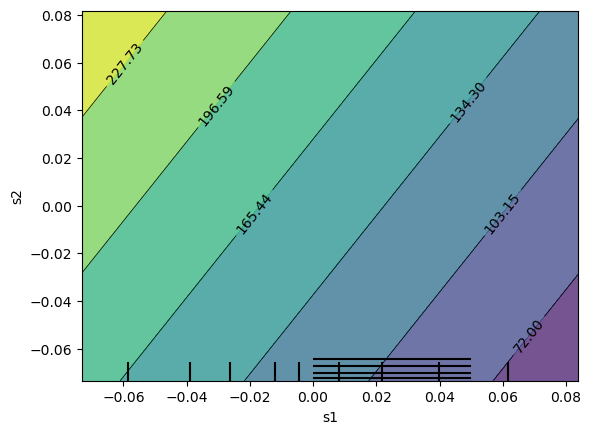

In [77]:
PartialDependenceDisplay.from_estimator(lm_all, df.drop('target',axis=1) , [(4, 5)],feature_names=featurenames)

In [39]:
print(ale_eff)

s2            -0.115613     -0.100895     -0.094632     -0.081480  \
s1                                                                  
-0.126781  1.059542e-13  1.251389e-13  1.002699e-13  8.748009e-14   
-0.100638  1.251389e-13  1.123491e-13  8.748009e-14  7.469032e-14   
-0.089630  1.251389e-13  1.123491e-13  8.748009e-14  7.469032e-14   
-0.084126  8.428264e-14  7.149288e-14  4.662388e-14  4.804497e-14   
-0.075870  5.704517e-14  4.425540e-14  3.359726e-14  4.922920e-14   
...                 ...           ...           ...           ...   
 0.087868 -3.264854e-12 -2.822896e-12 -2.421439e-12 -2.078958e-12   
 0.091996 -3.444266e-12 -2.973886e-12 -2.544008e-12 -2.173105e-12   
 0.109883 -3.455634e-12 -2.956833e-12 -2.526955e-12 -2.156052e-12   
 0.126395 -3.462740e-12 -2.963939e-12 -2.534060e-12 -2.163157e-12   
 0.153914 -3.465582e-12 -2.966781e-12 -2.536903e-12 -2.165999e-12   

s2            -0.078035     -0.072712     -0.070833     -0.068328  \
s1                               

In [55]:
import numpy as np

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']],
                  columns=diabetes['feature_names'] + ['target'])

clf_all = GradientBoostingRegressor(n_estimators=80).fit(df.drop("target",axis=1), df['target'])
clf = GradientBoostingRegressor(n_estimators=80).fit(X_train, y_train)

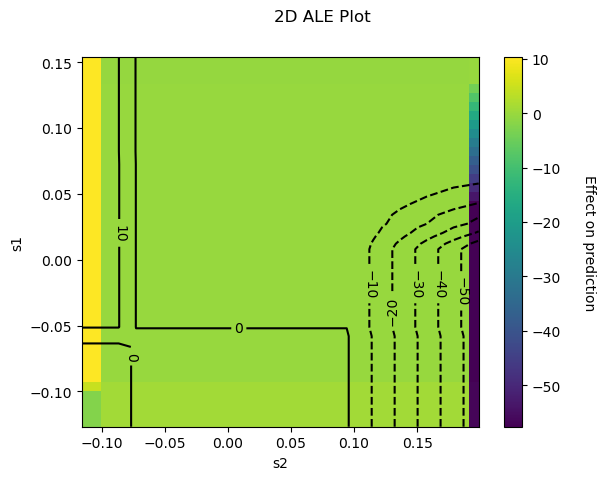

In [60]:
from PyALE import ale

# Create a pandas DataFrame from the dataset
test_data = pd.DataFrame(data=X_test,
                  columns=diabetes['feature_names'])
## 2D - continuous
ale_eff = ale(X=df.drop("target",axis=1), model=clf_all, feature=["s1", "s2"],grid_size=40,plot=True, contour=True)


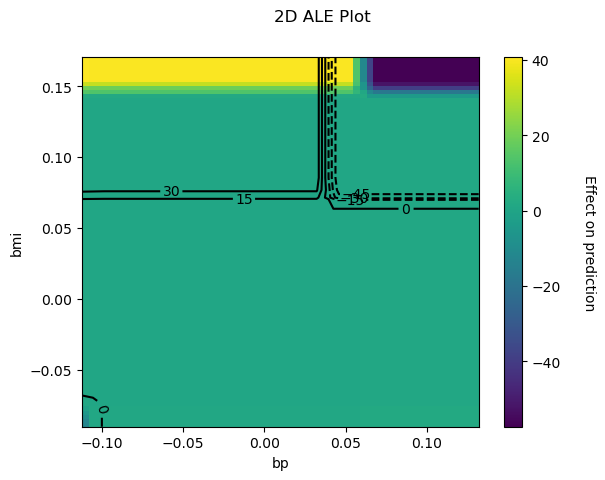

In [61]:
ale_eff = ale(X=df.drop("target",axis=1), model=clf_all, feature=["bmi", "bp"],grid_size=100,plot=True, contour=True)

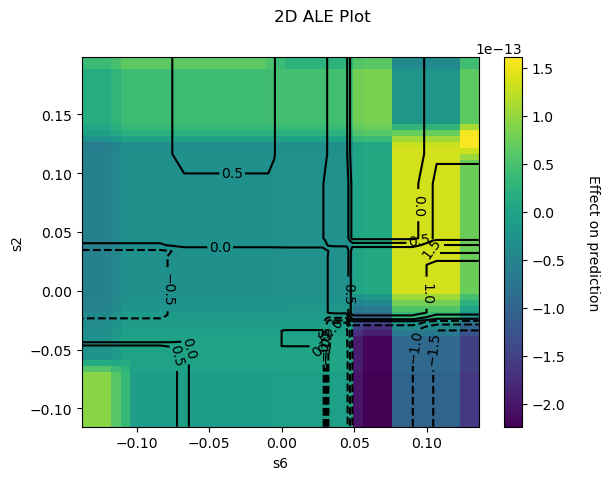

In [62]:
ale_eff = ale(X=df.drop("target",axis=1), model=clf_all, feature=["s2", "s6"],grid_size=60,plot=True, contour=True)

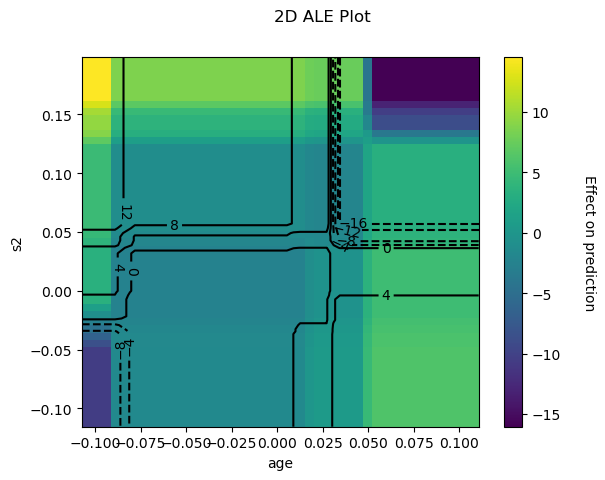

In [63]:
ale_eff = ale(X=df.drop("target",axis=1), model=clf_all, feature=["s2", "age"],grid_size=50,plot=True, contour=True)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


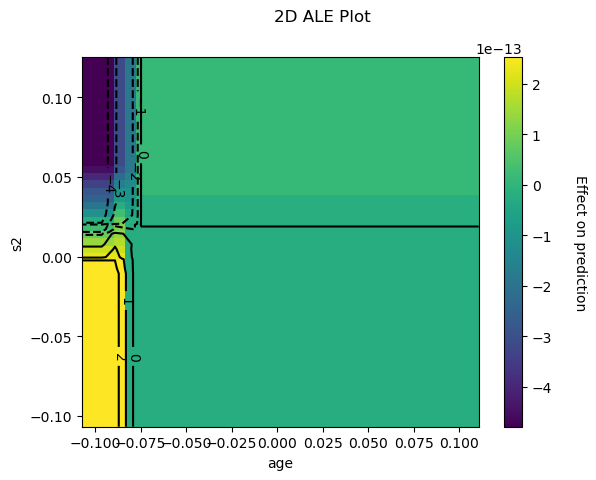

In [64]:
ale_eff = ale(X=test_data, model=clf, feature=["s2", "age"],grid_size=50,plot=True, contour=True)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


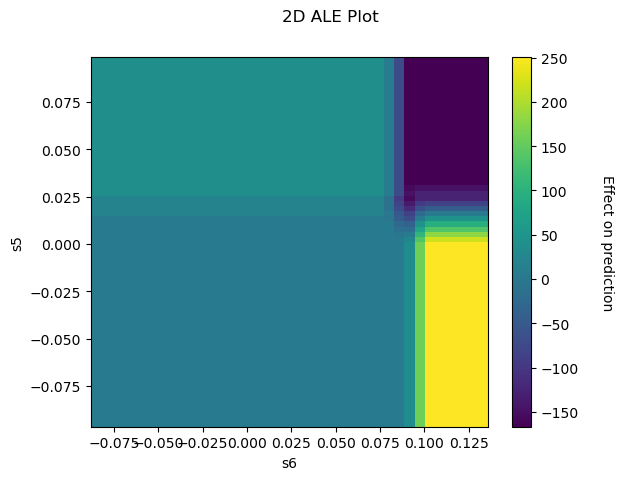

In [68]:
ale_eff = ale(X=test_data, model=clf, feature=["s5", "s6"],grid_size=100,plot=True)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


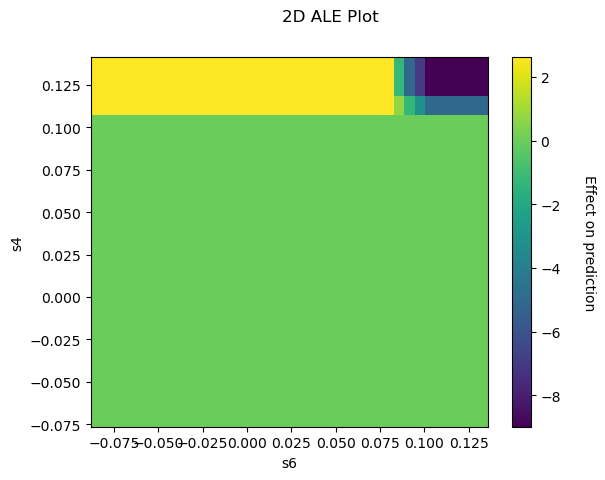

In [69]:
ale_eff = ale(X=test_data, model=clf, feature=["s4", "s6"],grid_size=100,plot=True)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


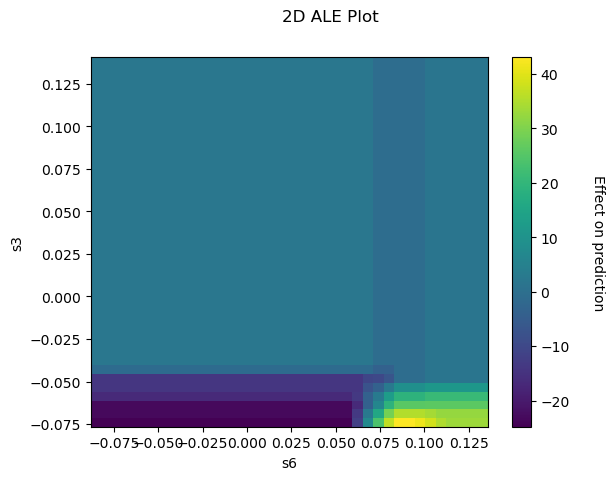

In [71]:
ale_eff = ale(X=test_data, model=clf, feature=["s3", "s6"],grid_size=100,plot=True)

In [149]:
ale_eff = ale(X=test_data, model=clf, feature=["s2", "s2"],grid_size=100,plot=True)

ValueError: Columns must be same length as key

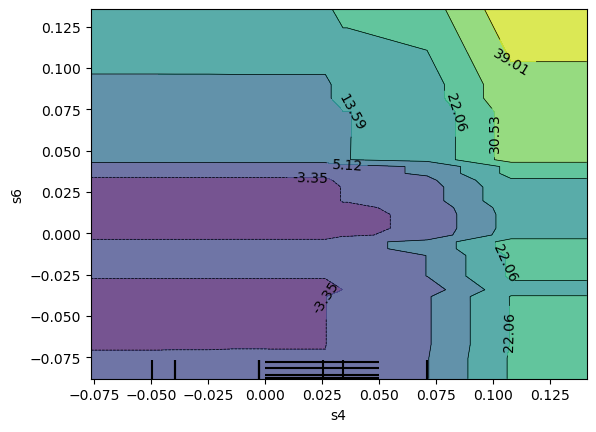

In [98]:
#ale_eff = ale(X=test_data, model=clf, feature=["s3", "s6"],grid_size=100,plot=True)

PartialDependenceDisplay.from_estimator(clf, X_test, [(7,9)], feature_names=featurenames)

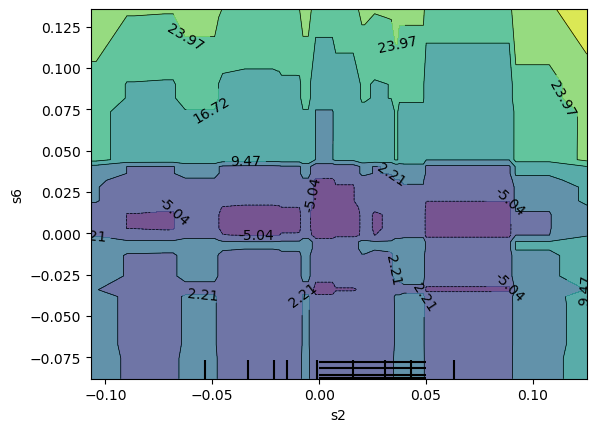

In [99]:
PartialDependenceDisplay.from_estimator(clf, X_test, [(5,9)], feature_names=featurenames)

c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(
c:\Users\achakkirala\AppData\Local\miniconda3\envs\env-02\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


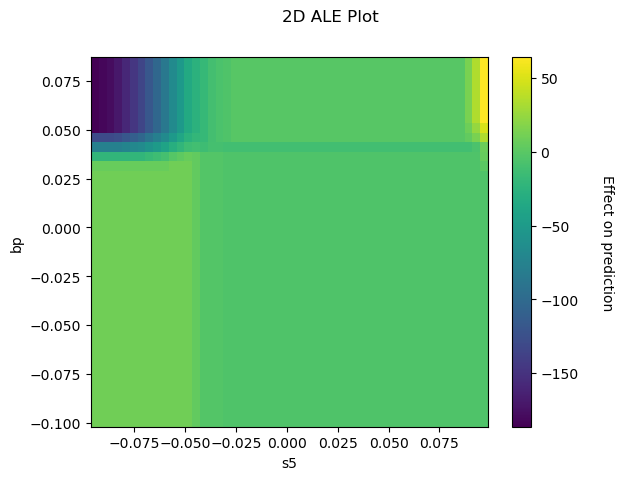

In [90]:
ale_eff = ale(X=test_data, model=clf, feature=["bp", "s5"],grid_size=60,plot=True)